## Eletric Power Consuption DataSet  Information

DataSet from University of California Irvine (UCI)
<br>
Available at https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
<br><br>
**Attribute Information:**
<br>
1.date: Date in format dd/mm/yyyy
<br>
2.time: time in format hh:mm:ss 
<br>
3.global_active_power: household global minute-averaged active power (in kilowatt) 
<br>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
<br>
5.voltage: minute-averaged voltage (in volt) 
<br>
6.global_intensity: household global minute-averaged current intensity (in ampere) 
<br>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a 
dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
<br>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a 
washing-machine, a tumble-drier, a refrigerator and a light. 
<br>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


## Transforming data to DataFrame

In [1]:
import pandas as pd
df = pd.read_csv('household_power_consumption.txt', sep=';', infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])

In [2]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
## Convert data nan

columns_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_fill:
    df[column].fillna((df[column].mean()), inplace=True)

## Adding Sub_metering_4
Acoording to the dataset information, the following equation gives the active energy consumed by other household eletrical equipments.
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

In [9]:
df['Sub_metering_4'] = (df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [10]:
_period = -1
# consumo de energia por dia divido em periodos dos dia 
gap_per_day_period = {1: [], 2: [], 3: [], 4: []}

start_index = -1
end_index = -1

for index, row in df.iterrows():
    dt = row['Date']
    time = row['Time']
    hr = int(time[:2])
    end_index = index        
    
    if(hr >= 0 and hr < 6):
        period = 1 # Madrugada
    elif(hr >= 6 and hr < 12):
        period = 2 # Manha
    elif(hr >= 12 and hr < 18):
        period = 3 # Tarde
    elif(hr >= 18 and hr < 24):
        period = 4 # Noite
        
    if(period != _period and _period != -1):
        gap_avg = df['Global_active_power'].iloc[start_index : end_index].mean(axis=0)
        
        gap_per_day_period[period].append([dt, gap_avg])
        
        _period = period
        start_index = index
    
    if(_period == -1):
        start_index = index
        _period = period
        

In [21]:
# consume_per_period = pd.DataFrame(data=gap_per_day_period[4], columns = ['Date', 'GAP'])
# consume_per_period.head()

consume_at_dawn = pd.DataFrame(data=gap_per_day_period[1], columns = ['Date', 'GAP'])
consume_at_morning = pd.DataFrame(data=gap_per_day_period[2], columns = ['Date', 'GAP'])
consume_at_afternoon = pd.DataFrame(data=gap_per_day_period[3], columns = ['Date', 'GAP'])
consume_at_night = pd.DataFrame(data=gap_per_day_period[4], columns = ['Date', 'GAP'])

frames = [consume_at_dawn, consume_at_morning, consume_at_afternoon, consume_at_night]

consume_per_period = pd.concat(frames, keys=['DAWN', 'MORNING', 'AFTERNOON', 'NIGHT'])
consume_per_period.head()

Date       GAP
DAWN 0  17/12/2006  2.936533
     1  18/12/2006  2.493917
     2  19/12/2006  2.253900
     3  20/12/2006  1.588983
     4  21/12/2006  3.124622

In [22]:
import datetime as dt

consume_per_period['Date'] = pd.to_datetime(consume_per_period['Date'])
consume_per_period['Date'] = consume_per_period['Date'].map(dt.datetime.toordinal)

In [23]:
consume_per_period.describe()

,Date,GAP
count,5765.000000,5765.000000
mean,733383.223764,1.092072
std,418.078209,0.698318
min,732661.000000,0.161300
25%,733022.000000,0.455789
50%,733382.000000,0.990694
75%,733742.000000,1.551678
max,734117.000000,4.418233


In [24]:
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
def define_training_test(seed_number, X, Y):
    # Separar os conjuntos de treino e teste
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=np.random.seed(seed_number), shuffle=False)

    return X_train, Y_train, X_test, Y_test

In [26]:
def linear_regression_graph(period_key):
    dataset = consume_per_period.loc[period_key]
    
    # Definir as datas para predição do consumo de energia
    source_ft = ['Date']
    target_ft = 'GAP'

    # Separar os conjuntos de treino e teste
    X = np.array(dataset[source_ft])
    Y = np.array(dataset[target_ft])

    X_train, Y_train, X_test, Y_test = define_training_test(101, X, Y)

    # Criar modelo para Regressão Linear
    regr = sk.linear_model.LinearRegression()

    # Treinar o modelo
    regr.fit(X_train, Y_train)

    # Fazer predições para o conjunto de teste
    Y_pred = regr.predict(X_test)

    # Informações sobre a regressão e erro/variâcia dos dados
    print('Coefficients:     ', regr.coef_)
    print('Intercept:        ', regr.intercept_)
    print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_pred))
    print('Variance score:     %.2f' % r2_score(Y_test, Y_pred))

    # Fazer scatterplot plotando a linha de regressão
    sns.regplot(x=X_test, y=Y_test, fit_reg = True, scatter_kws={'alpha':0.3})

    # Ajustar datas no eixo x (converter de ordinal para data)
    ax = plt.gca()
    xticks = ax.get_xticks()
    ax.set_xticklabels([dt.datetime.fromordinal(int(tm)).strftime('%Y-%m-%d\n %H:%M:%S') for tm in xticks], rotation=50)

    # Definir periodo do dia
    if(period_key == 'DAWN'):
        period_name = 'Madrugada'
    elif(period_key == 'MORNING'):
        period_name = 'Manhã'
    elif(period_key == 'AFTERNOON'):
        period_name = 'Tarde'
    elif(period_key == 'NIGHT'):
        period_name = 'Noite'

    # Adicionar título e x/y labels
    ax.set_title('Média do Consumo de Energia de ' + period_name)
    ax.set_ylabel('Média do Consumo de Energia')

    plt.show()

Coefficients:      [-0.00021308]
Intercept:         157.81917473281143
Mean squared error: 0.41
Variance score:     -0.02


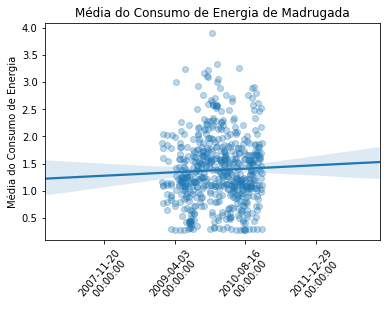

In [27]:
linear_regression_graph('DAWN')

Coefficients:      [-0.00010189]
Intercept:         75.21137428670586
Mean squared error: 0.06
Variance score:     -0.09


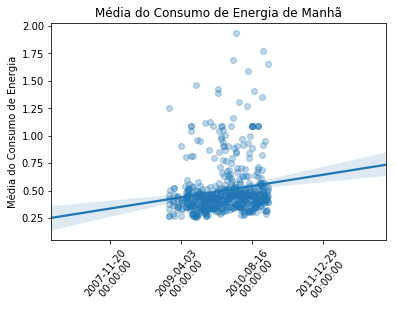

In [28]:
linear_regression_graph('MORNING')

Coefficients:      [0.00016474]
Intercept:         -119.47584579238763
Mean squared error: 0.25
Variance score:     -0.16


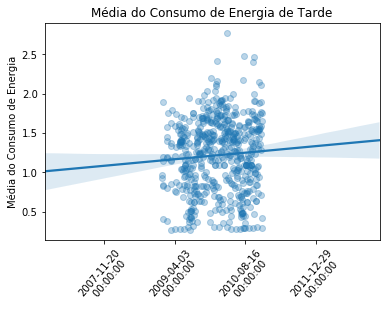

In [29]:
linear_regression_graph('AFTERNOON')

Coefficients:      [0.00010191]
Intercept:         -73.60685749016339
Mean squared error: 0.34
Variance score:     -0.07


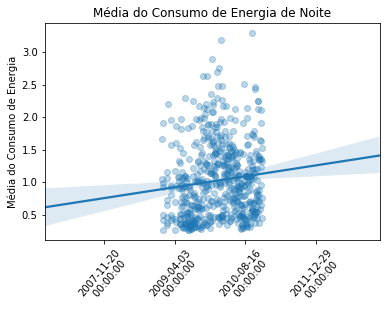

In [30]:
linear_regression_graph('NIGHT')